#**Importing the Required Libraries**

In [ ]:
import os

In [ ]:
import glob

In [ ]:
from IPython.display import Image, display

In [ ]:
from IPython import display

In [ ]:
display.clear_output()

# **In the First Step, We need to check whether we have access to the GPU or not**

In [ ]:
!nvidia-smi

In [ ]:
HOME = os.getcwd()

In [ ]:
print(HOME)

#**Installing Ultralytics using Pip Install**

In [ ]:
!pip install ultralytics

##Checking whether YOLOv8 is Installed and its working Fine

In [ ]:
import ultralytics

In [ ]:
ultralytics.checks()

#**Importing the Sign Language Dataset from Roboflow**

In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="oAyijJVsXGFghtIRKSey")
project = rf.workspace("tensorflow-tf-records").project("tf-records")
dataset = project.version(6).download("yolov8")

#**Train the YOLOv8 Model on the Custom Dataset**

In [19]:
%cd {HOME}

/content


In [20]:
%cd {dataset.location}

/content/datasets/tf-records-6


In [21]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8l.pt data={dataset.location}/data.yaml epochs=50 imgsz=396

/content
Ultralytics YOLOv8.0.228 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8l.pt, data=/content/datasets/tf-records-6/data.yaml, epochs=50, time=None, patience=50, batch=16, imgsz=396, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train9, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=T

In [22]:
!ls {HOME}/runs/detect/train/

args.yaml  weights


#**Displaying the Confusion Matrix**

/content


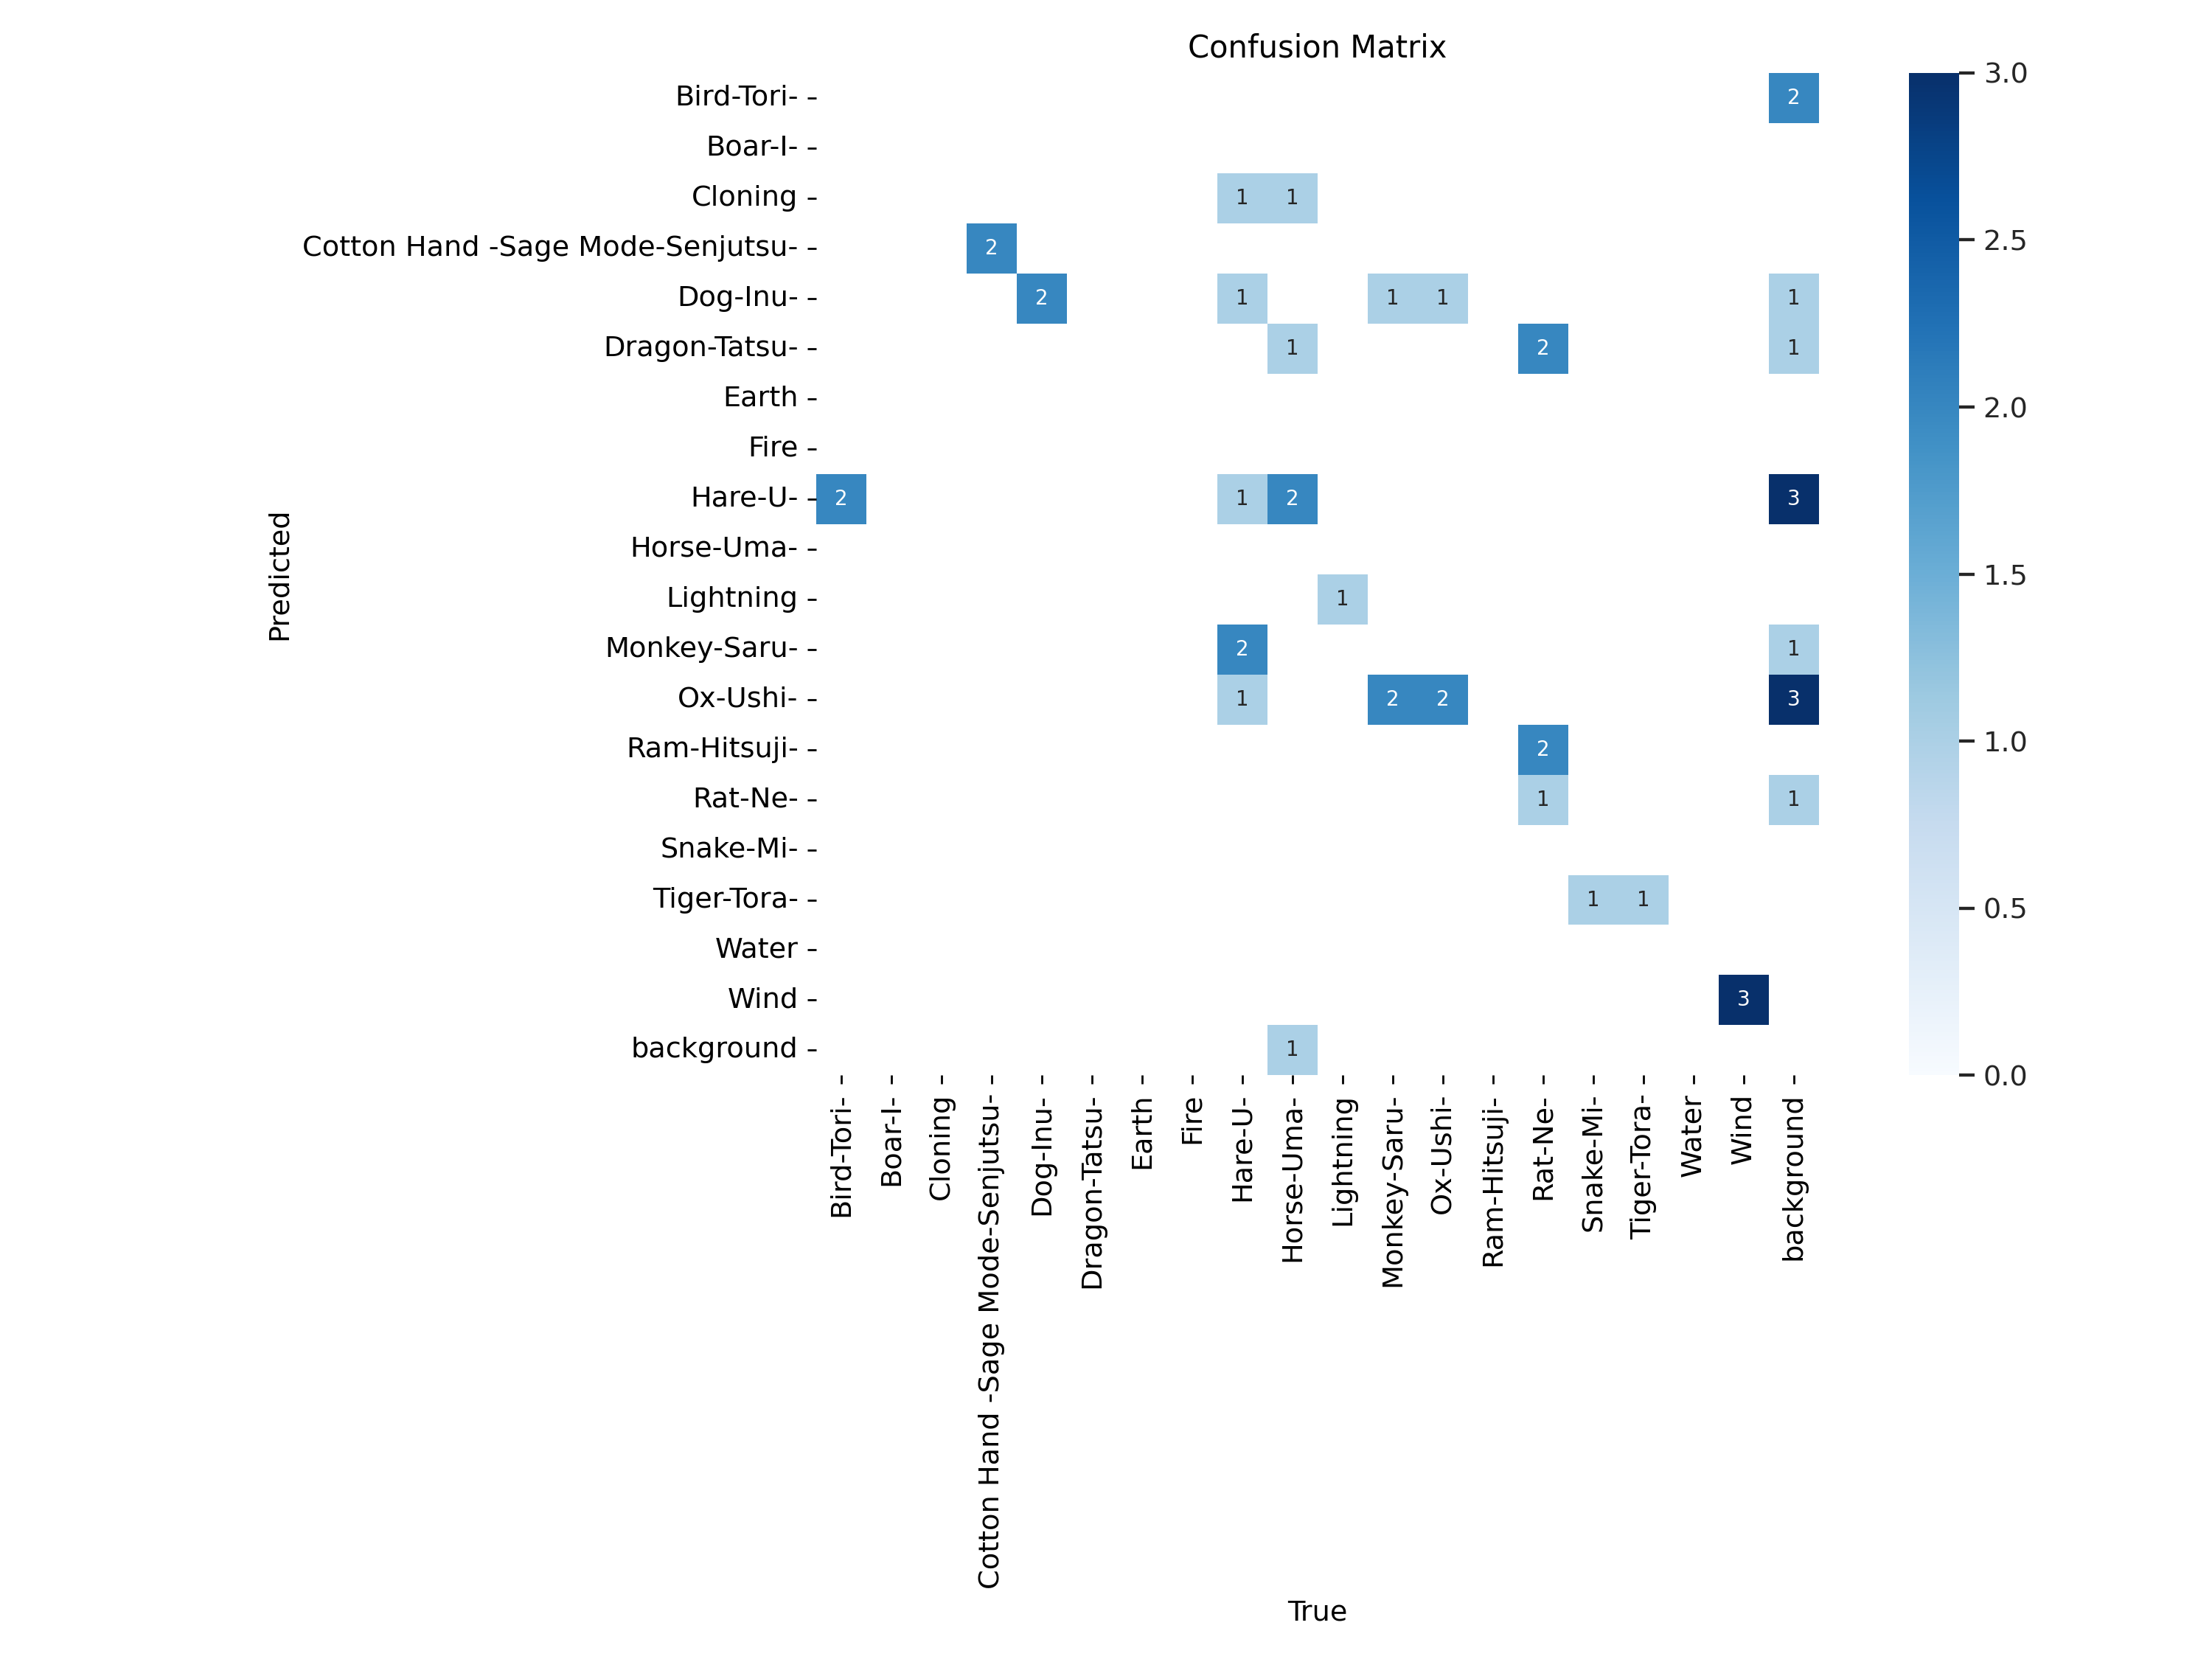

In [23]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train9/confusion_matrix.png', width=900)

#**Training and Validation Loss**

/content


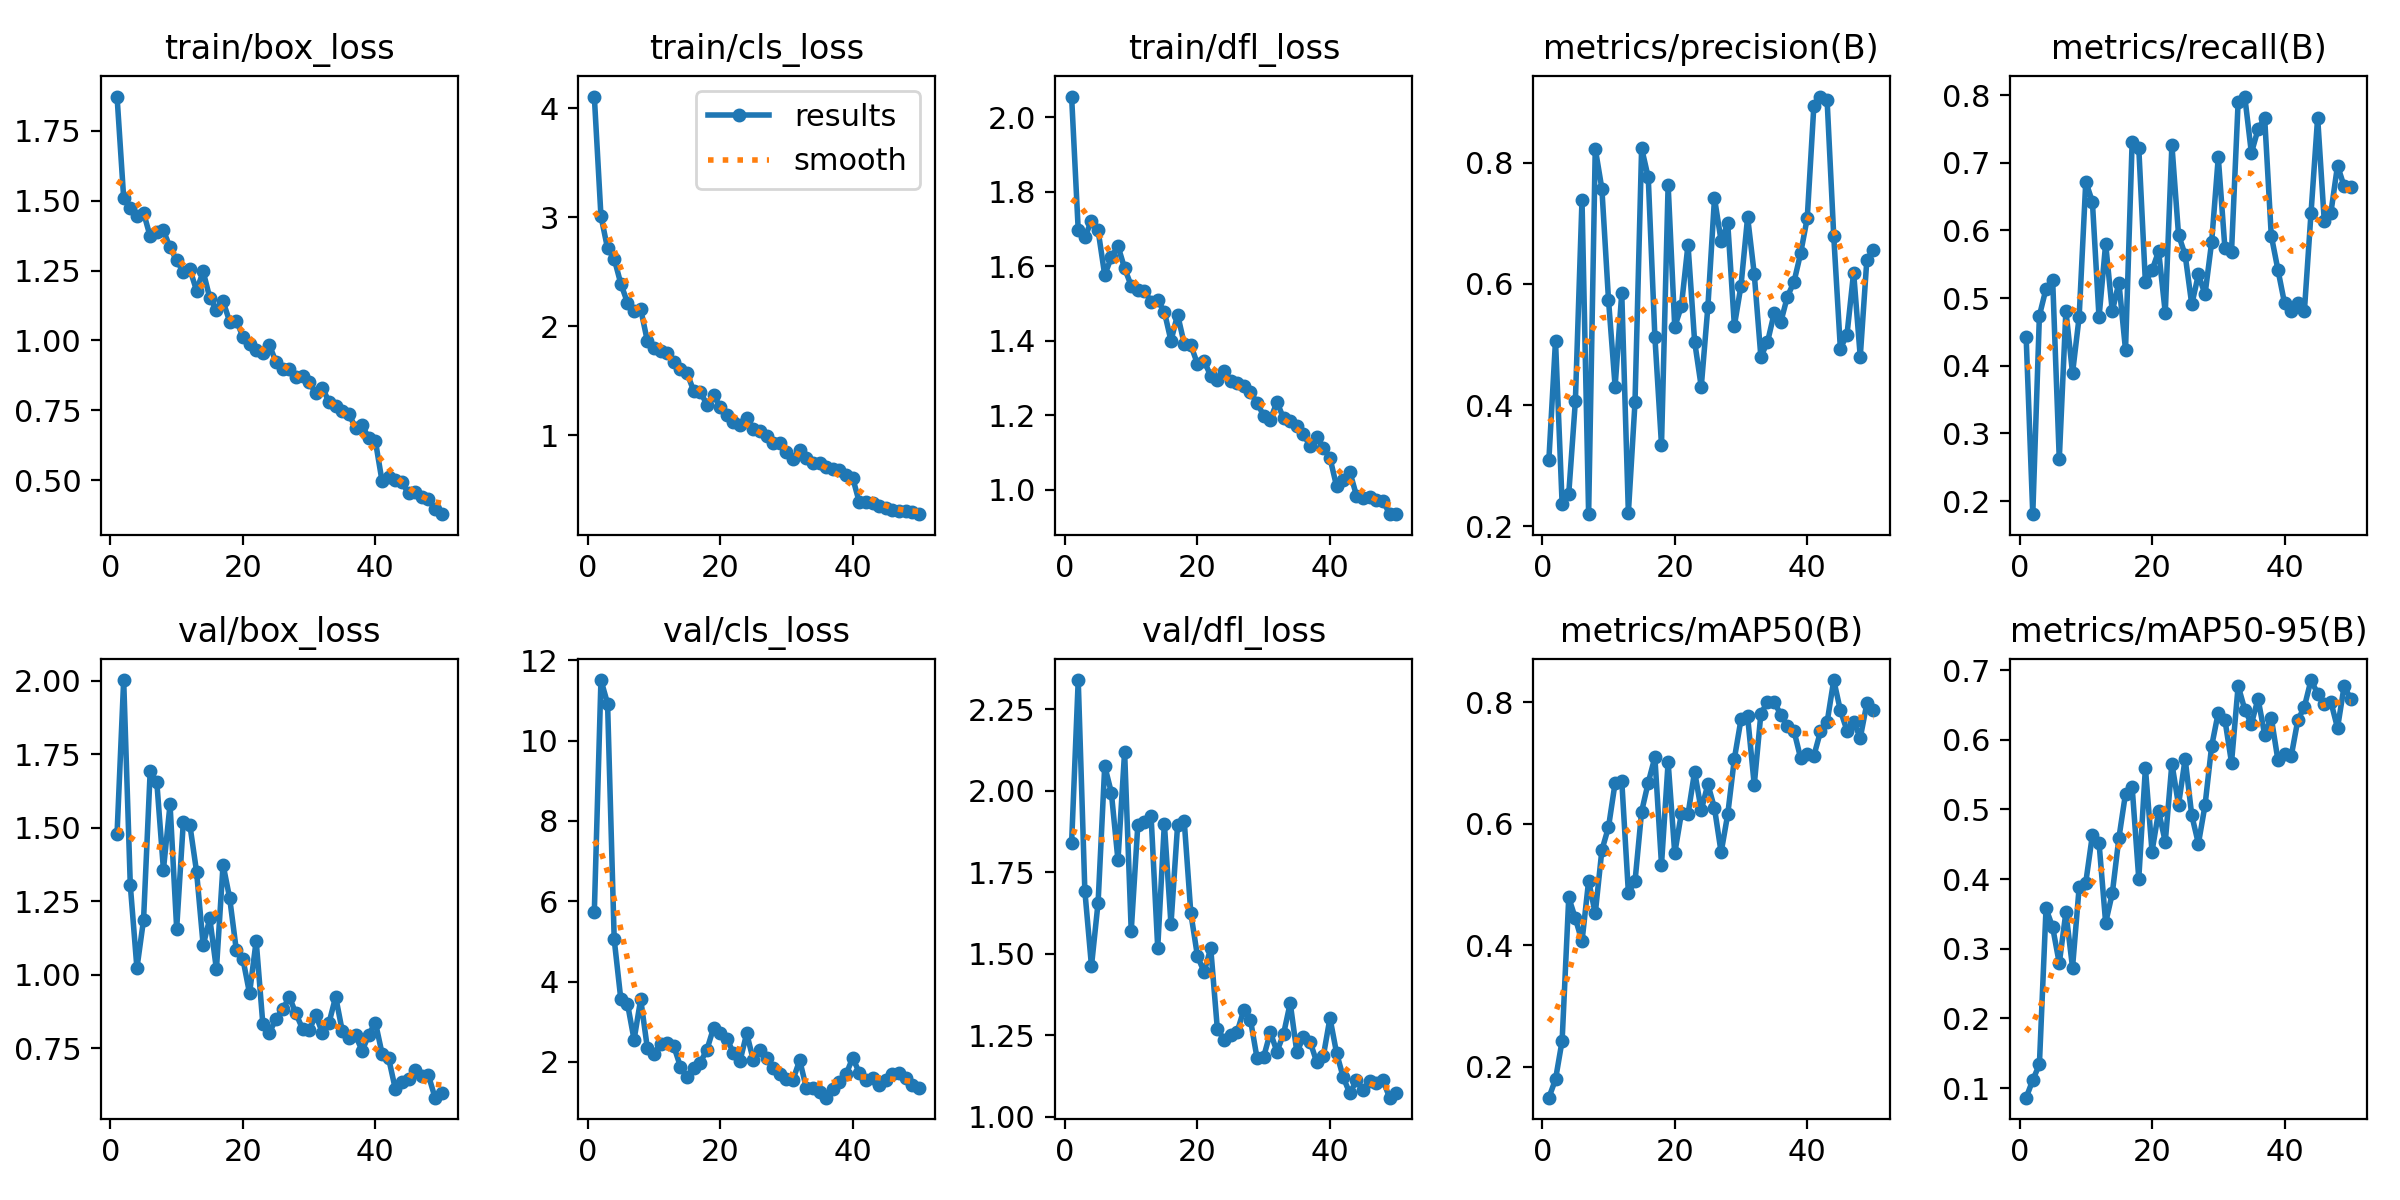

In [25]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train9/results.png', width=600)

/content


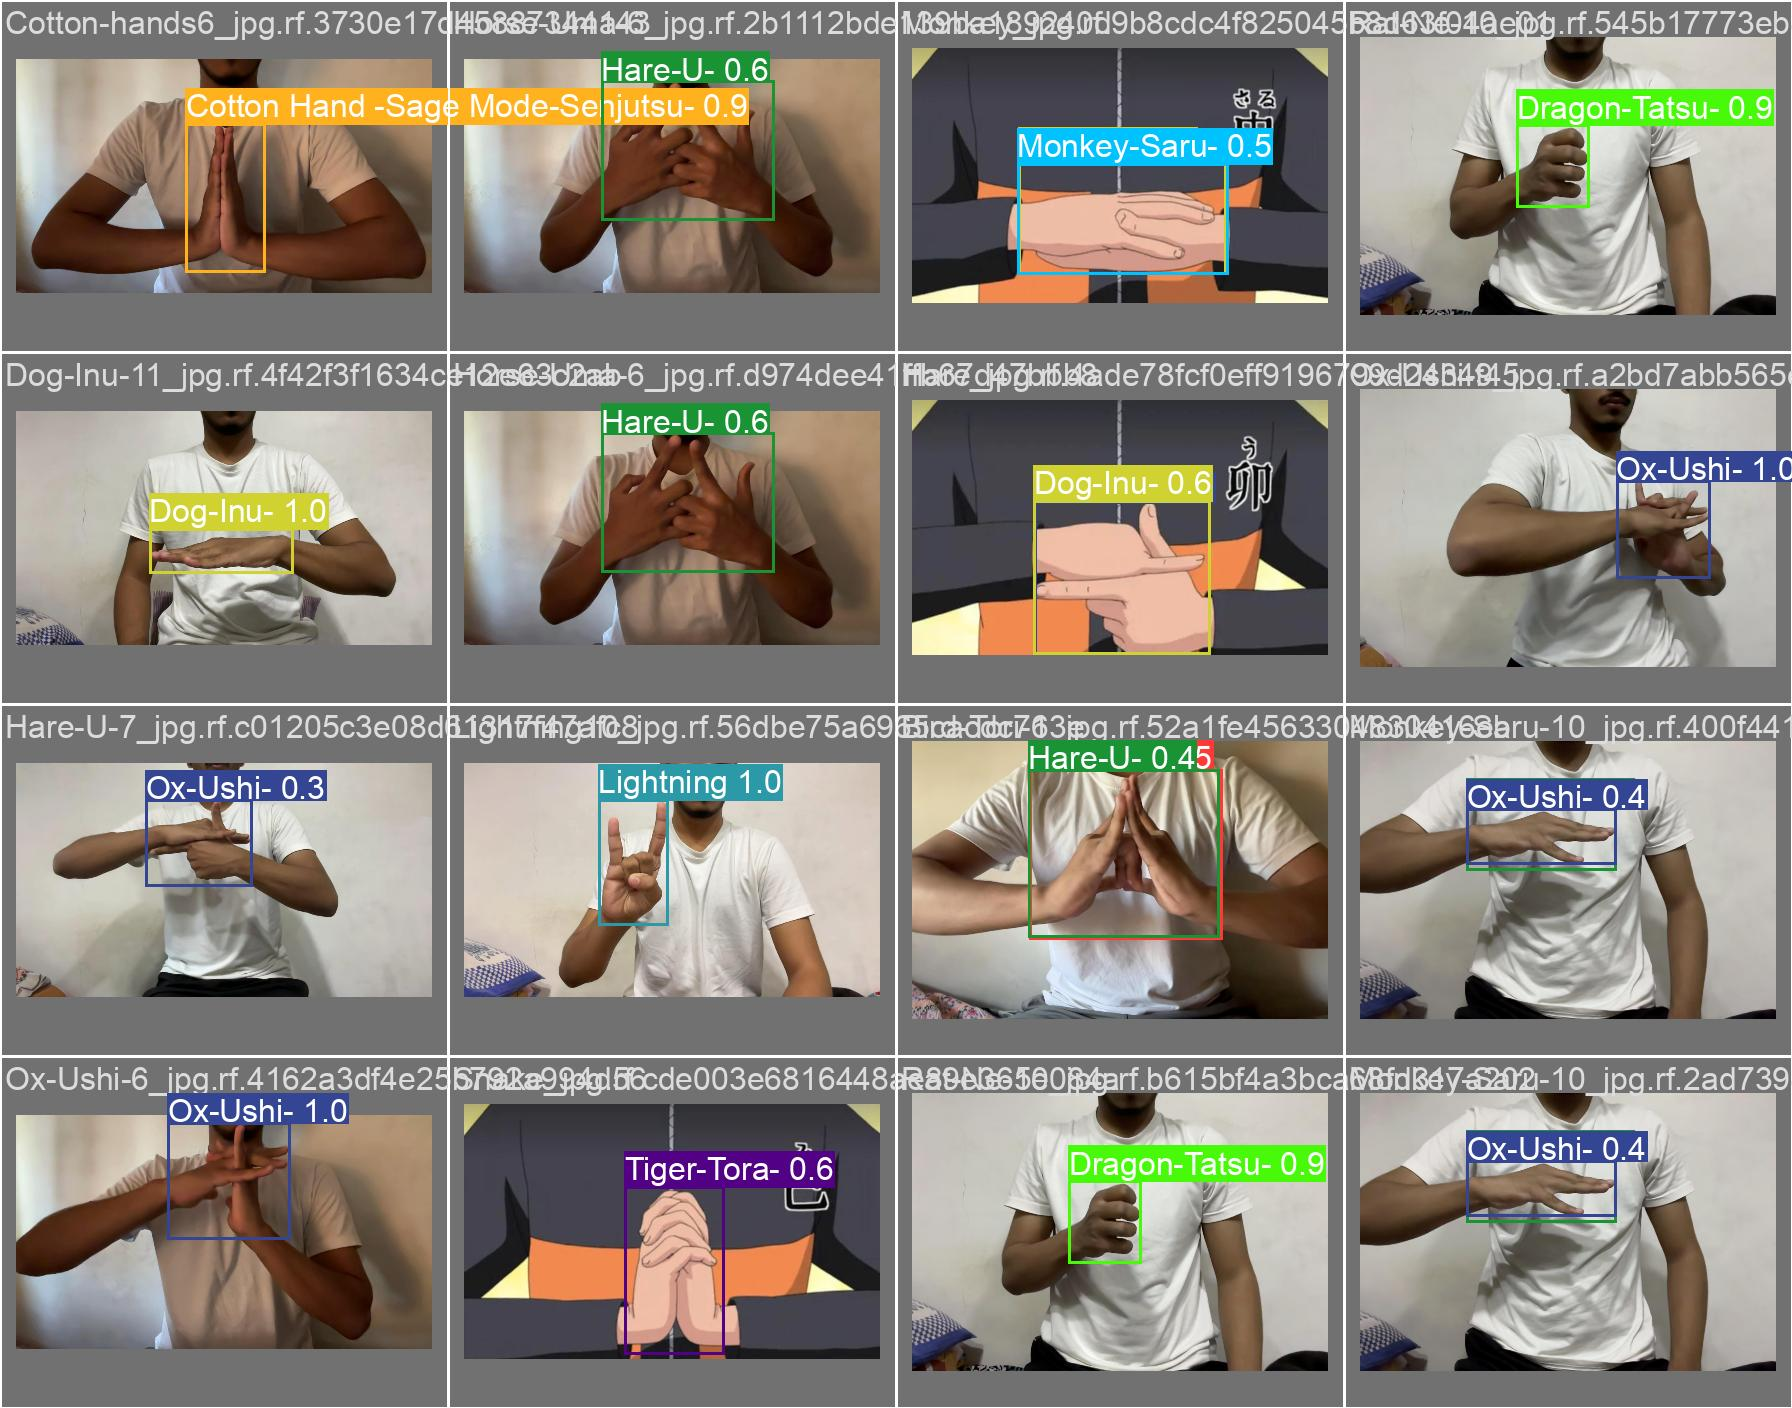

In [26]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train9/val_batch0_pred.jpg', width=600)

#**Validate Custom Model**

In [29]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train9/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.0.228 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43621257 parameters, 0 gradients, 164.9 GFLOPs
val: Scanning /content/datasets/tf-records-6/tf-records-6/valid/labels.cache... 34 images, 0 backgrounds, 0 corrupt: 100% 34/34 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 3/3 [00:03<00:00,  1.18s/it]
                   all         34         34       0.68      0.626      0.827      0.679
            Bird-Tori-         34          2      0.969          1      0.995      0.697
Cotton Hand -Sage Mode-Senjutsu-         34          2      0.787          1      0.995      0.796
              Dog-Inu-         34          2      0.322          1      0.995      0.995
               Hare-U-         34          6      0.148      0.167      0.285      0.215
            Horse-Uma-         34          5          1          0      0.995      0.773
        

#**Inference with Custom Model**

In [30]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train9/weights/best.pt conf=0.25 source={dataset.location}/test/images

/content
Ultralytics YOLOv8.0.228 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43621257 parameters, 0 gradients, 164.9 GFLOPs

WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/142 /content/datasets/tf-records-6/test/images/Bird-Tori-11_jpg.rf.efa6472f63b40d5e56fd1cd8f37e3562.jpg: 256x416 1 Bird-Tori-, 200.8ms
image 2/142 /content/datasets/tf-records-6/test/images/Bird-Tori-7_jpg.rf.7b791cdefe4fedf9d01ed40267cfc659.jpg: 288x416 1 Bird-Tori-, 111.7ms
image 3/142 /content/datasets/tf-records-6/test/images/Bird-Tori-8_jpg.rf.b5e829773c5d193c5f588345e09c8983.jpg: 288x416 (no detections), 29.9ms
image 4/142 /content/datasets/tf-records-6/test/images/Bird-Tori-9_jpg.rf.f21fc251e4b3ff8412a4df86188faf0a.jpg: 288x416 1 Hare-U-, 30.0ms
image 5/142 /content/datasets/tf-records-6/test/images/Bird1_jpg.rf.b948f8c603e38cba605c4c296e529f82.jpg: 320x416 1 Ram-Hitsuji-, 1 Tiger-Tora-, 116.5ms
image 6/142 /content/datasets/tf-records-6/test/images/Bir

In [33]:
from IPython.display import display, Image as IPImage
import glob

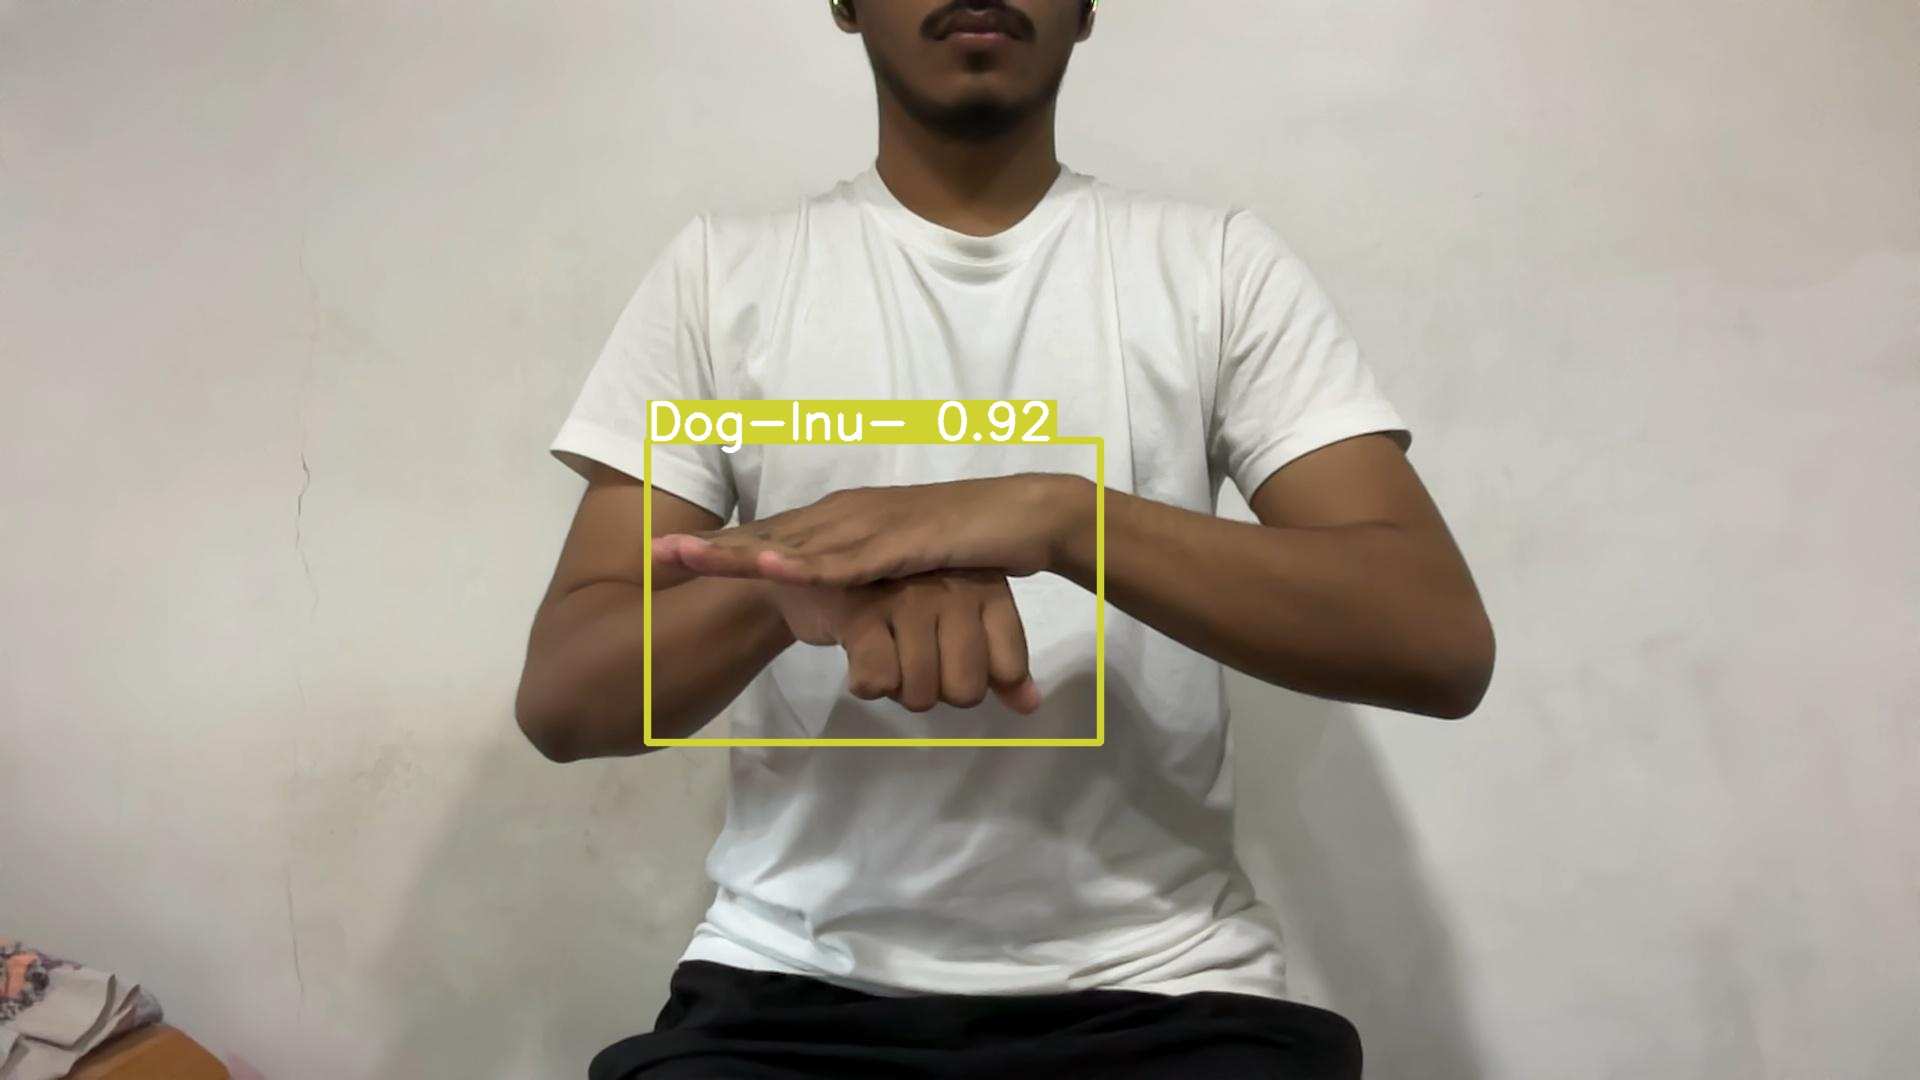

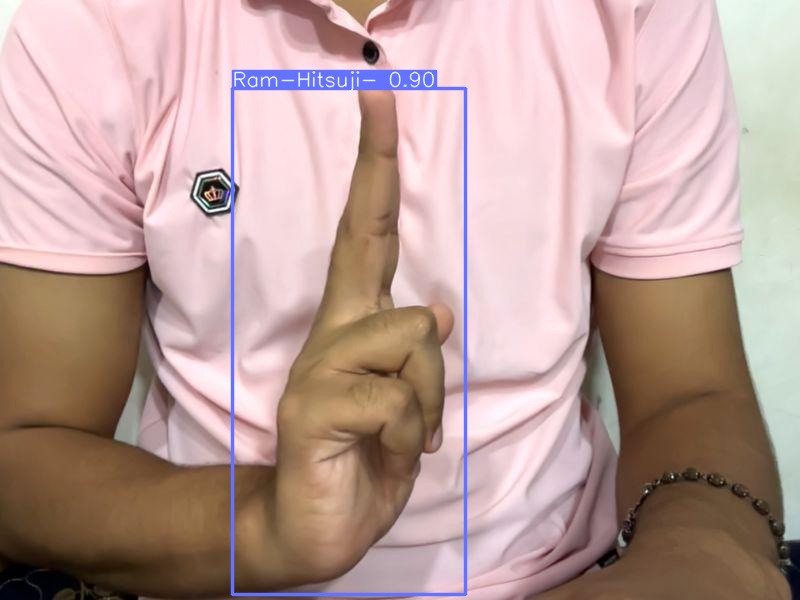

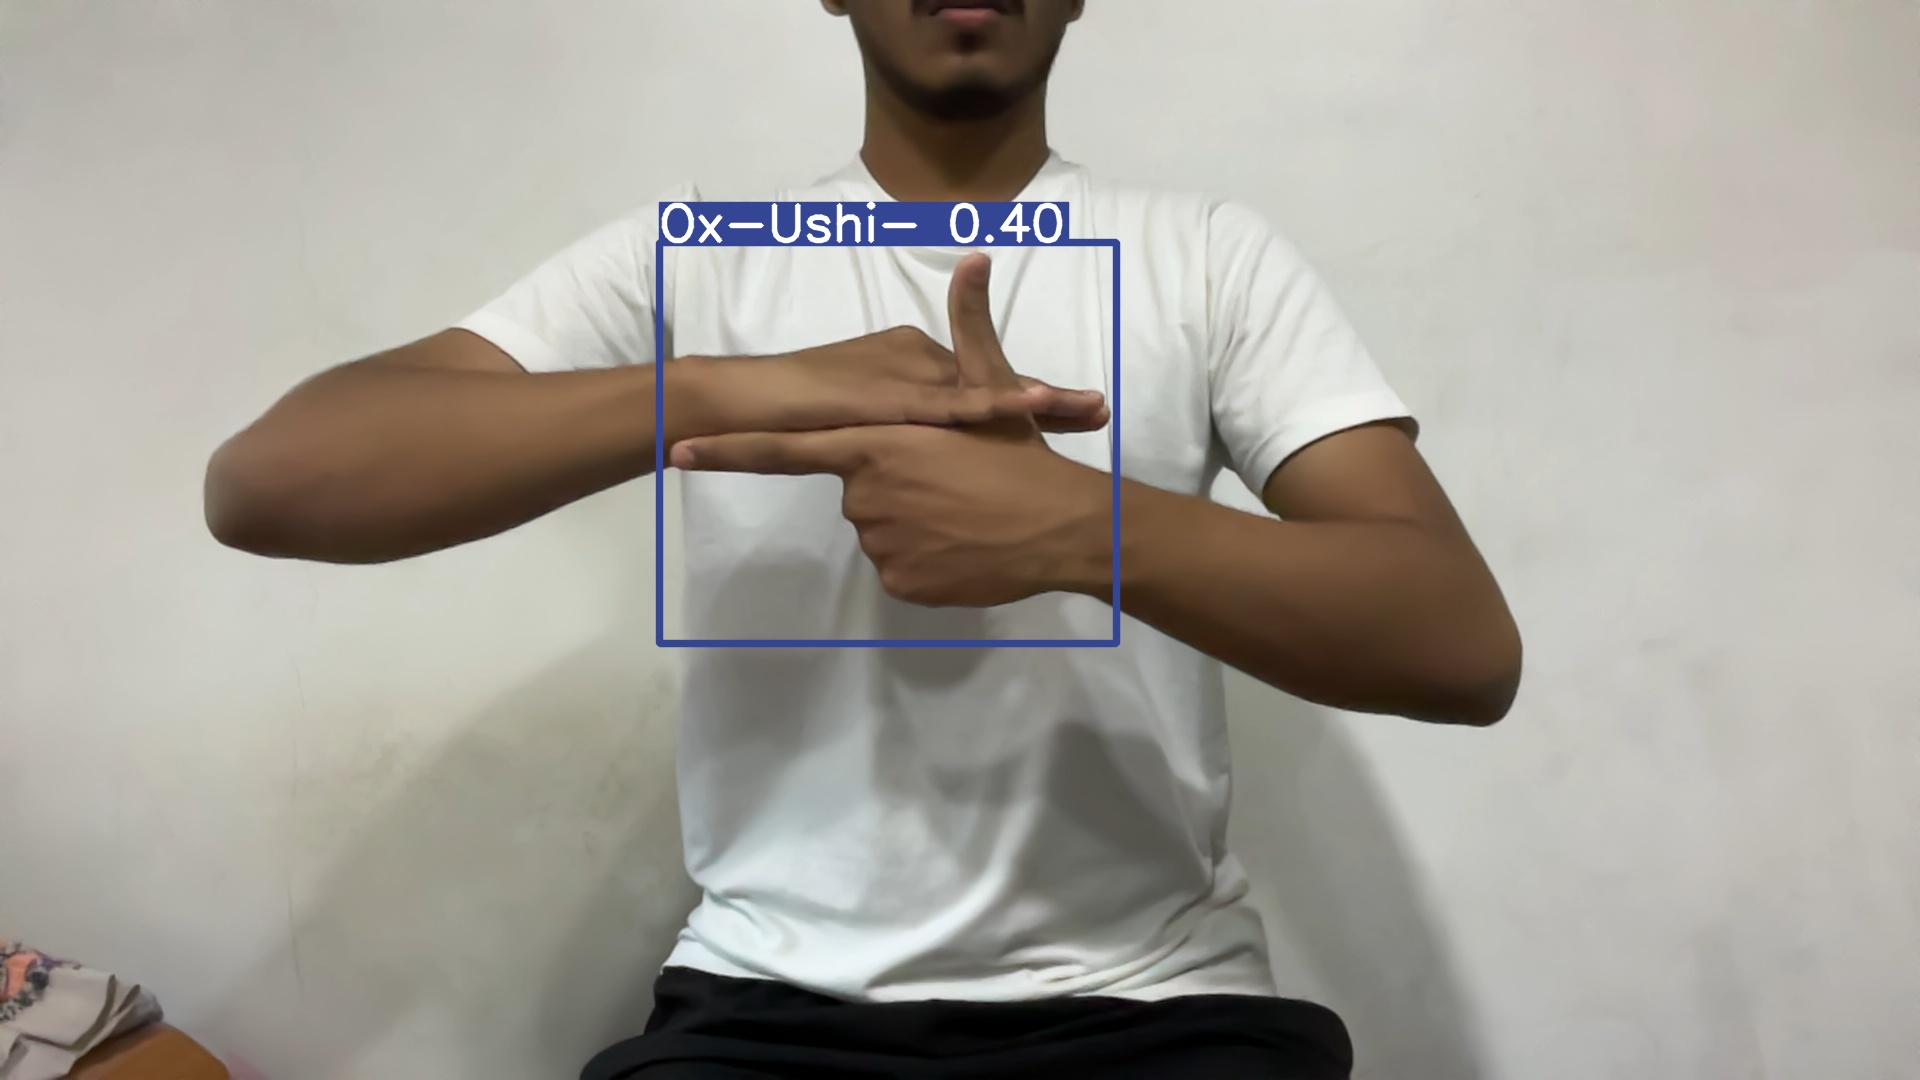

In [34]:
for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

#**Testing on a Demo Video**

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/best.pt conf=0.25 source='/content/demovideo/testvideo1.mp4'

#**Display the Demo Video**

In [ ]:
!rm "/content/result_compressed.mp4"

In [ ]:
from IPython.display import HTML
from base64 import b64encode
import os

# Input video path
save_path = '/content/runs/detect/predict2/testvideo1.mp4'

# Compressed video path
compressed_path = "/content/result_compressed.mp4"

os.system(f"ffmpeg -i {save_path} -vcodec libx264 {compressed_path}")

# Show video
mp4 = open(compressed_path,'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)